In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# 1. 读取数据
# --- 全球温度 ---
temp_df = pd.read_csv("Global_TAVG_monthly.txt", 
                      delim_whitespace=True, 
                      comment='%', 
                      header=None, 
                      names=["Year", "Month", "TempAnomaly", "Unc", "AnnualAnom", "AnnualUnc",
                             "FiveYrAnom", "FiveYrUnc", "TenYrAnom", "TenYrUnc", "TwentyYrAnom", "TwentyYrUnc"],
                      usecols=[0,1,2,4])  # 只取有用列

# 取年度平均温度异常
annual_temp = temp_df.groupby("Year")["TempAnomaly"].mean().reset_index()

annual_temp

/var/folders/t9/fg_z55rj35n5dtjqkbq_zp640000gn/T/ipykernel_78517/2681220094.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_df = pd.read_csv("Global_TAVG_monthly.txt",


,Year,TempAnomaly
0,1850,-0.426750
1,1851,-0.389917
2,1852,-0.329500
3,1853,-0.229667
4,1854,-0.297750
...,...,...
171,2021,0.840500
172,2022,0.889750
173,2023,1.191000
174,2024,1.269833


In [2]:
# --- 全球海平面 ---
# 重新读取并命名列
sea_df = pd.read_csv("GMSL_TPJAOS_5.2.txt", 
                     delim_whitespace=True, 
                     comment='H', 
                     header=None,
                     names=["AltType", "Cycle", "YearFrac", "Nobs", "Wobs",
                            "GMSL_noGIA", "SD_noGIA", "Smooth_noGIA",
                            "GMSL_GIA", "SD_GIA", "Smooth_GIA",
                            "GMSL_GIA_removed", "GMSL_noGIA_removed"])

# 检查是否读到
print(sea_df.head())

# 取年份
sea_df["Year"] = sea_df["YearFrac"].astype(float).astype(int)
annual_sea = sea_df.groupby("Year")["GMSL_GIA"].mean().reset_index()

annual_sea

   AltType  Cycle     YearFrac    Nobs       Wobs  GMSL_noGIA  SD_noGIA  \
0        0     11  1993.011526  466881  338409.69      -37.91     89.01   
1        0     12  1993.038692  459563  333609.59      -40.95     89.95   
2        0     13  1993.065858  402996  292736.50      -41.09     86.90   
3        0     14  1993.093025  462894  336670.31      -43.38     88.73   
4        0     15  1993.120191  460498  332486.09      -38.66     89.87   

   Smooth_noGIA  GMSL_GIA  SD_GIA  Smooth_GIA  GMSL_GIA_removed  \
0        -37.67    -37.90   89.01      -37.66            -37.64   
1        -39.07    -40.94   89.95      -39.06            -38.53   
2        -39.65    -41.07   86.90      -39.63            -38.70   
3        -39.40    -43.36   88.73      -39.38            -38.12   
4        -38.51    -38.63   89.87      -38.48            -36.96   

   GMSL_noGIA_removed  
0              -37.66  
1              -38.55  
2              -38.73  
3              -38.16  
4              -37.00  


/var/folders/t9/fg_z55rj35n5dtjqkbq_zp640000gn/T/ipykernel_78517/2760808645.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sea_df = pd.read_csv("GMSL_TPJAOS_5.2.txt",


,Year,GMSL_GIA
0,1993,-32.949189
1,1994,-28.408649
2,1995,-24.477838
3,1996,-23.626667
4,1997,-19.039459
5,1998,-20.544865
6,1999,-18.643243
7,2000,-13.422973
8,2001,-7.150270
9,2002,-5.631667


In [3]:
# 2. 对齐时间范围（例如 1993–2024）
merged = pd.merge(annual_temp, annual_sea, on="Year", how="inner")
merged = merged[(merged["Year"] >= 1993) & (merged["Year"] <= 2024)]


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置绘图风格
sns.set(style="whitegrid", font_scale=1.1)

# 基本信息
print(merged.info())
print(merged.describe().T)  # 转置方便阅读

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         32 non-null     int64  
 1   TempAnomaly  32 non-null     float64
 2   GMSL_GIA     32 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
None
             count         mean        std          min          25%  \
Year          32.0  2008.500000   9.380832  1993.000000  2000.750000   
TempAnomaly   32.0     0.687385   0.242397     0.255333     0.534146   
GMSL_GIA      32.0    15.017431  31.282127   -32.949189    -8.718446   

                     50%          75%          max  
Year         2008.500000  2016.250000  2024.000000  
TempAnomaly     0.649167     0.850500     1.269833  
GMSL_GIA        9.910856    42.605203    72.887568  


In [11]:
merged.describe()

,Year,TempAnomaly,GMSL_GIA
count,32.000000,32.000000,32.000000
mean,2008.500000,0.687385,15.017431
std,9.380832,0.242397,31.282127
min,1993.000000,0.255333,-32.949189
25%,2000.750000,0.534146,-8.718446
50%,2008.500000,0.649167,9.910856
75%,2016.250000,0.850500,42.605203
max,2024.000000,1.269833,72.887568


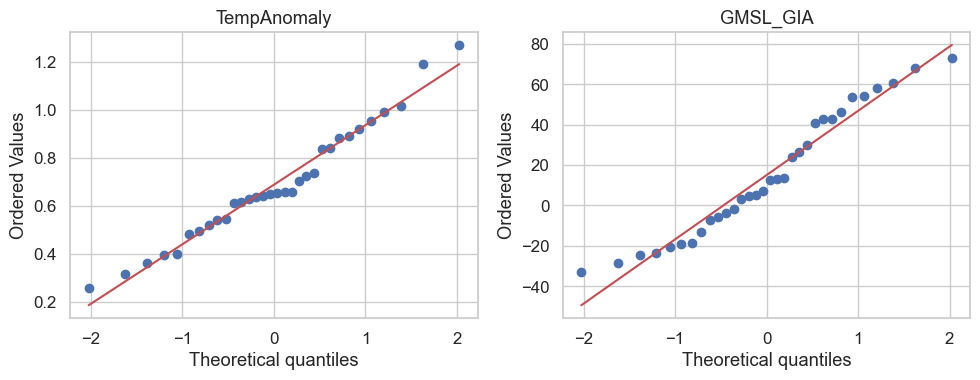

In [14]:
cols = ['TempAnomaly', 'GMSL_GIA']  # 你想检查的列名
fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for ax, col in zip(axes, cols):
    stats.probplot(merged[col].dropna(), dist="norm", plot=ax)
    ax.set_title(f"{col}")

plt.tight_layout()
plt.show()


In [5]:
# 3. 计算相关系数
r, pval = pearsonr(merged["TempAnomaly"], merged["GMSL_GIA"])
print(f"r = {r:.3f}")

r = 0.926


In [6]:
# 4. 线性回归
X = merged["TempAnomaly"].values.reshape(-1, 1)
y = merged["GMSL_GIA"].values
model = LinearRegression().fit(X, y)

print(f"线性回归方程: GMSL = {model.coef_[0]:.2f} * Temp + {model.intercept_:.2f}")
print(f"R² = {model.score(X, y):.3f}")

线性回归方程: GMSL = 119.54 * Temp + -67.15
R² = 0.858


In [7]:
import statsmodels.api as sm

# 自变量 X 和因变量 y
X = merged["TempAnomaly"]
y = merged["GMSL_GIA"]

# 添加常数项（截距）
X = sm.add_constant(X)

# 建立 OLS 模型并拟合
model = sm.OLS(y, X).fit()

# 输出标准回归表
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               GMSL_GIA   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     181.3
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.98e-14
Time:                        14:54:10   Log-Likelihood:                -123.84
No. Observations:                  32   AIC:                             251.7
Df Residuals:                      30   BIC:                             254.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -67.1532      6.460    -10.395      

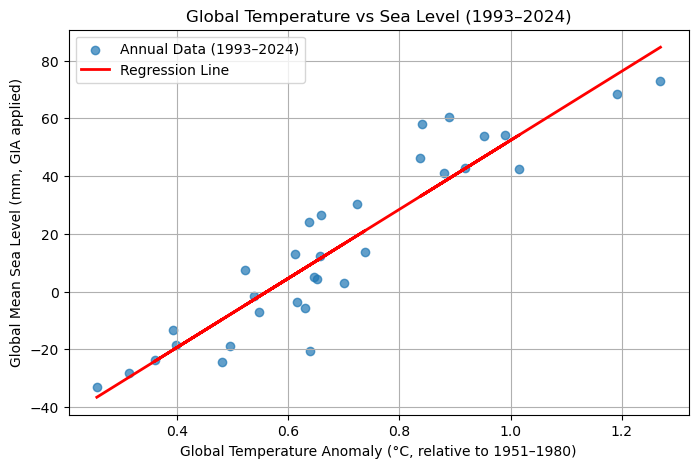

In [8]:
# 5. 绘图
plt.figure(figsize=(8,5))
plt.scatter(merged["TempAnomaly"], merged["GMSL_GIA"], alpha=0.7, label="Annual Data (1993–2024)")
plt.plot(merged["TempAnomaly"], model.predict(X), color="red", lw=2, label="Regression Line")
plt.xlabel("Global Temperature Anomaly (°C, relative to 1951–1980)")
plt.ylabel("Global Mean Sea Level (mm, GIA applied)")
plt.title("Global Temperature vs Sea Level (1993–2024)")
plt.legend()
plt.grid(True)
plt.show()

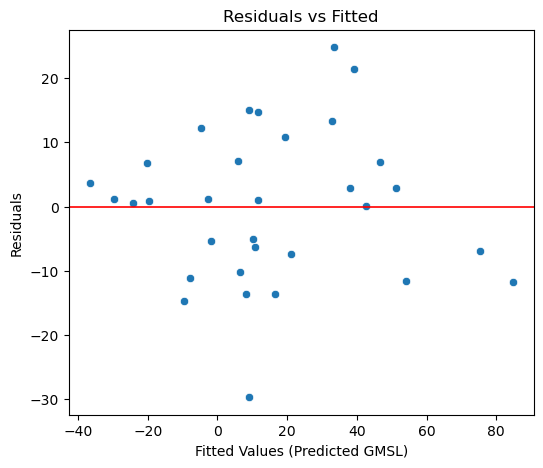

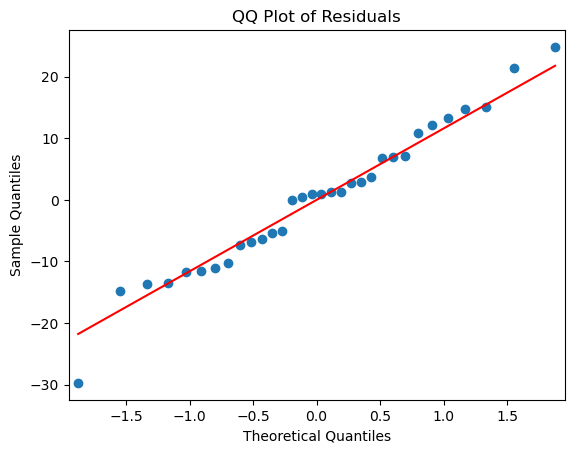

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro

# 1. 回归
X = sm.add_constant(merged["TempAnomaly"])
y = merged["GMSL_GIA"]
model = sm.OLS(y, X).fit()
resid = model.resid
fitted = model.fittedvalues

# --- 2. 线性关系 + 方差齐性 ---
plt.figure(figsize=(6,5))
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color='red', lw=1.2)
plt.xlabel("Fitted Values (Predicted GMSL)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# --- 3. 残差正态性 (QQ Plot) ---
sm.qqplot(resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np

# Breusch–Pagan 异方差检验
bp_test = het_breuschpagan(resid, X)
labels = ['Lagrange multiplier', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier': np.float64(0.5239699053483484), 'p-value': np.float64(0.469153128731174), 'f-value': np.float64(0.4993989748129454), 'f p-value': np.float64(0.48521736097646173)}
